<font style='font-size:1.5em'>**NLTK Portion of the Project**</font>

**Author: Sentipedia**  

**Course: DS105L Project** 

---


## Import

### Importing Libraries 

In [2]:
# importing libraries for web scrapping and API acess
import requests
from bs4 import BeautifulSoup

# importing libraries for dataframes 
import pandas as pd
import numpy as np

# importing libraries for plots 
from plotnine import *

# importing libraries for ploting networks
import networkx as nx
import matplotlib.pyplot as plt

# import language model 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

# downloading NLTK analyzers 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# import libraries for plotnine
from plotnine import *

# import ggthemes
from plotnine.themes import theme_bw
import matplotlib.font_manager as fm

[nltk_data] Downloading package punkt to /Users/ap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/ap/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wo

# Data

### Cleaing the Data

In [3]:
# dataframe with all replies in the UK subreddit
df_reddit_full = pd.read_csv('reddit_full.csv', usecols=['url', 'comment', 'comment_id', 'date'])
df_reddit_full['comment'].replace('[deleted]', None, inplace=True)

# dataframe with only replies related to Brexit in the UK subreddit
df_reddit_brexit = pd.read_csv('reddit_brexit.csv', usecols=['url', 'comment', 'comment_id', 'date'])
df_reddit_brexit['comment'].replace('[deleted]', None, inplace=True)

# Initializing NLTK Tools

In [4]:
# define lemmatizer, stop words and analyzer for nltk
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
analyzer = SentimentIntensityAnalyzer()

# Basic Sentiment Analysis Using Vader

### Vader with All Comments

In [5]:
# looking at sentiment scores for the full dataset
df_reddit_full_nltk = df_reddit_full.copy()

# define function to preprocess text
def text_preprocess(comment):
    try:
        # tokenize comments and preprocess text for sentiment analysis
        preprocessed_tokens = [word.lower() for word in word_tokenize(comment)]        
        preprocessed_tokens = [word for word in preprocessed_tokens if word not in stop_words]        
        preprocessed_tokens = [lemmatizer.lemmatize(word) for word in preprocessed_tokens]        
        preprocessed_tokens = [word for word in preprocessed_tokens if (len(word) > 1) and (word.isalpha()) and (word.isalnum())]
        return preprocessed_tokens
    except:
        return None

# define function to get sentiment scores
def get_score_nltk(tokens):
    try:
        # use sentiment analyzer from NLTK to get sentiment scores
        preprocessed_text = ' '.join(tokens)
        sentiment_scores = analyzer.polarity_scores(preprocessed_text)
        return sentiment_scores['compound']
    except:
        return None

In [6]:
# apply functions to get sentiment scores
df_reddit_full_nltk['tokens'] = df_reddit_full_nltk['comment'].apply(text_preprocess)
df_reddit_full_nltk['score'] = df_reddit_full_nltk['tokens'].apply(get_score_nltk)
df_reddit_full_nltk

,url,date,comment,comment_id,tokens,score
0,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-26,None,1,None,NaN
1,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,None,1_1,None,NaN
2,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,None,1_1_1,None,NaN
3,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,Small capitalism,1_1_1_1,"[small, capitalism]",0.0000
4,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,Mixed economy.,1_1_1_1_1,"[mixed, economy]",0.0000
...,...,...,...,...,...,...
85763,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,Not exactly a counter argument.,53_1_2,"[exactly, counter, argument]",-0.3612
85764,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,\&gt; implying you're worth that much effort,53_1_2_1,"[gt, implying, worth, much, effort]",0.4588
85765,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,I didn't make the original argument. But if th...,53_1_2_1_1,"[make, original, argument, want, play, fair, e...",0.8807
85766,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,That's a serious accusation that needs investi...,53_2,"[serious, accusation, need, investigating, har...",-0.4019


### Vader with Comments Mentioning Brexit

In [7]:
# looking at sentiment scores for the Brexit dataset
df_reddit_brexit_nltk = df_reddit_brexit.copy()

# apply functions to get sentiment scores
df_reddit_brexit_nltk['tokens'] = df_reddit_brexit_nltk['comment'].apply(text_preprocess)
df_reddit_brexit_nltk['score'] = df_reddit_brexit_nltk['tokens'].apply(get_score_nltk)
df_reddit_brexit_nltk

,url,date,comment,comment_id,tokens,score
0,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,"Agree. With the Tories pushing Brexit, they h...",1_2_1_4_1,"[agree, tory, pushing, brexit, become, resting...",-0.4019
1,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,I just thought that with plenty of vaccination...,1_8_1_1,"[thought, plenty, vaccination, coming, brexit,...",0.7845
2,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,"If you don't listen to your core voter base, t...",1_11_1_1,"[listen, core, voter, base, wo, vote, labour, ...",0.0258
3,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,Much as I agree with your potential projection...,1_15,"[much, agree, potential, projection, overwhelm...",0.2960
4,https://www.reddit.com/r/unitedkingdom/comment...,2020-12-27,"Brexit, the word, is why it succeeded. Nobody ...",2,"[brexit, word, succeeded, nobody, would, enthu...",0.8316
...,...,...,...,...,...,...
11709,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,"By Britain they don't mean ordinary people, mo...",20_1_1,"[britain, mean, ordinary, people, know, go, as...",0.4019
11710,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,Because the people on the leave side see this ...,22,"[people, leave, side, see, establishment, find...",-0.6597
11711,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,Because ultimately it is the houses of parliam...,24,"[ultimately, house, parliament, voted, brexit,...",0.4215
11712,https://www.reddit.com/r/unitedkingdom/comment...,2018-07-19,"Democracy changes laws and governments, but po...",35,"[democracy, change, law, government, politicia...",0.0000


# Sentiment Over Time 

### Sentiment Over Time for All Comments

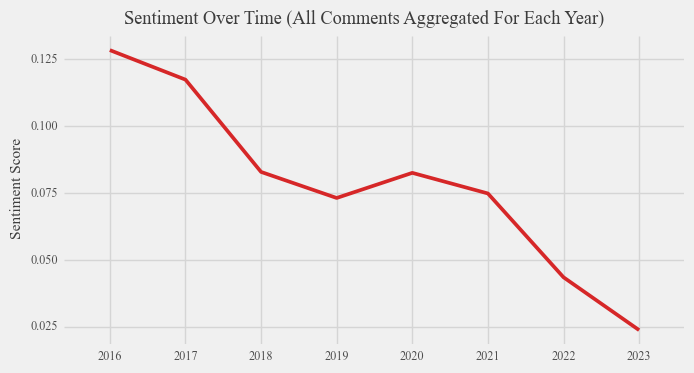

<ggplot: (8790837032159)>

In [10]:
df_reddit_full_nltk['date'] = pd.to_datetime(df_reddit_full_nltk['date'])
df_reddit_full_nltk['year'] = df_reddit_full_nltk['date'].dt.to_period('Y')
df_avg = df_reddit_full_nltk.groupby('year')['score'].mean().reset_index()

plot = (
    ggplot(df_avg, aes(x='year', y='score', group = 1)) +
    geom_line(color = '#d62728', size = 1.5) +
    xlab('') +
    ylab('Sentiment Score') +
    ggtitle('Sentiment Over Time (All Comments Aggregated For Each Year)') + 
    theme_538(base_family = 'Mono') +
    theme(figure_size=(8, 4)) +
    theme(text=element_text(family='Times New Roman'))
)

plot


### Sentiment Over Time for Brexit Comments

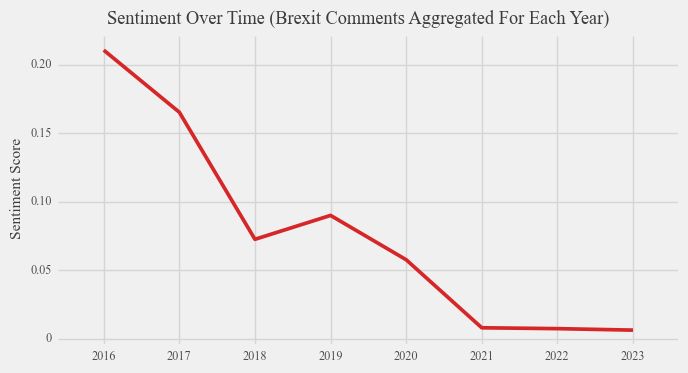

<ggplot: (8790861864117)>

In [16]:
df_reddit_brexit_nltk['date'] = pd.to_datetime(df_reddit_brexit_nltk['date'])
df_reddit_brexit_nltk['year'] = df_reddit_brexit_nltk['date'].dt.to_period('Y')
df_avg = df_reddit_brexit_nltk.groupby('year')['score'].mean().reset_index()

plot = (
    ggplot(df_avg, aes(x='year', y='score', group = 1)) +
    geom_line(color = '#d62728', size = 1.5) +
    xlab('') +
    ylab('Sentiment Score') +
    ggtitle('Sentiment Over Time (Brexit Comments Aggregated For Each Year)') + 
    theme_538(base_family = 'Mono') +
    theme(figure_size=(8, 4)) +
    theme(text=element_text(family='Times New Roman'))
)

plot

# Extracting Themes from Comments with Positive/Negative Sentiment

### Positive/Negative Sentiment for All Comments

In [13]:
# define function to get all nouns from tokens 
def get_nouns(tokens):
    try:
        nouns = [word for (word, pos) in pos_tag(tokens) if (pos and pos.startswith('N'))]
        return nouns
    except:
        return None

In [14]:
# apply functions to get nouns, adjectives and verbs tokens
df_reddit_full_nltk['nouns'] = df_reddit_full_nltk['tokens'].apply(get_nouns)

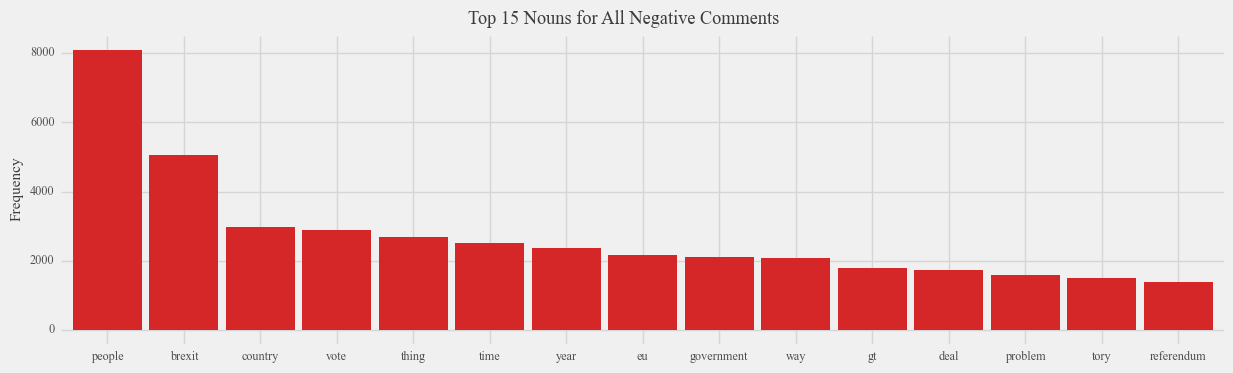

<ggplot: (8790843047921)>

In [18]:
# identify nouns of negative comments
negative_full_nouns = []
negative_full_nouns_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] < 0, 'nouns']

for value in negative_full_nouns_series: 
    for word in value:
        negative_full_nouns.append(word)

temp = pd.DataFrame({'theme': negative_full_nouns})
frequency = temp['theme'].value_counts().reset_index()
frequency.columns = ['theme', 'count']
top_15 = frequency.head(15)

# plot top 15 nouns for negative comments
plot = (
    ggplot(data=top_15) +
    aes(x='reorder(theme, -count)', y='count') +
    geom_bar(stat='identity', fill = '#d62728') +
    xlab('') +
    ylab('Frequency') +
    ggtitle('Top 15 Nouns for All Negative Comments') + 
    theme_538() +
    theme(figure_size=(15, 4)) +
    theme(text=element_text(family='Times New Roman'))
)

plot


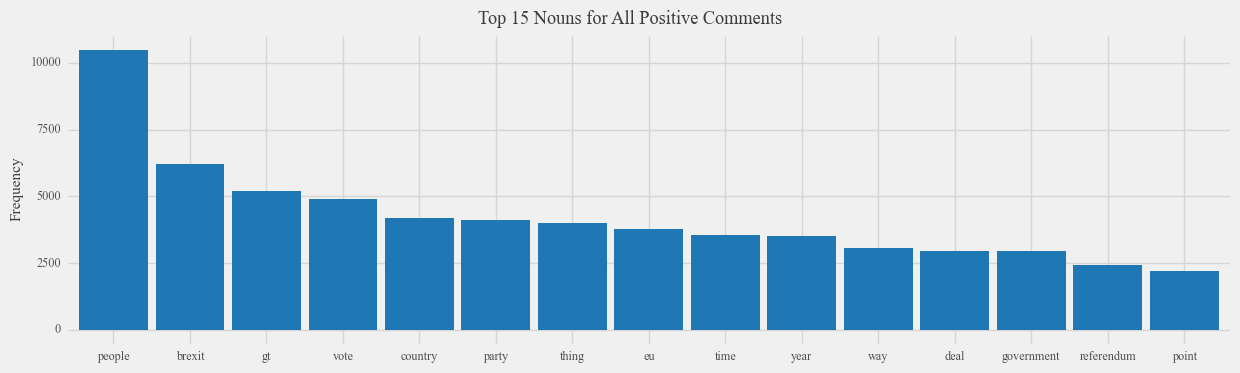

<ggplot: (8790831444345)>

In [21]:
# identify nouns of positive comments
positive_full_nouns = []
positive_full_nouns_series = df_reddit_full_nltk.loc[df_reddit_full_nltk['score'] > 0, 'nouns']

for value in positive_full_nouns_series:
    for word in value:
        positive_full_nouns.append(word)

temp = pd.DataFrame({'theme': positive_full_nouns})
frequency = temp['theme'].value_counts().reset_index()
frequency.columns = ['theme', 'count']
top_15 = frequency.head(15)

# plot top 15 nouns for negative comments
plot = (
    ggplot(data=top_15) +
    aes(x='reorder(theme, -count)', y='count') +
    geom_bar(stat='identity', fill = '#1f77b4') +
    xlab('') +
    ylab('Frequency') +
    ggtitle('Top 15 Nouns for All Positive Comments') + 
    theme_538() +
    theme(figure_size=(15, 4)) +
    theme(text=element_text(family='Times New Roman'))
)

plot

### Positive/Negative Sentiment on Brexit Comments

In [22]:
# apply functions to get nouns, adjectives and verbs tokens
df_reddit_brexit_nltk['nouns'] = df_reddit_brexit_nltk['tokens'].apply(get_nouns)


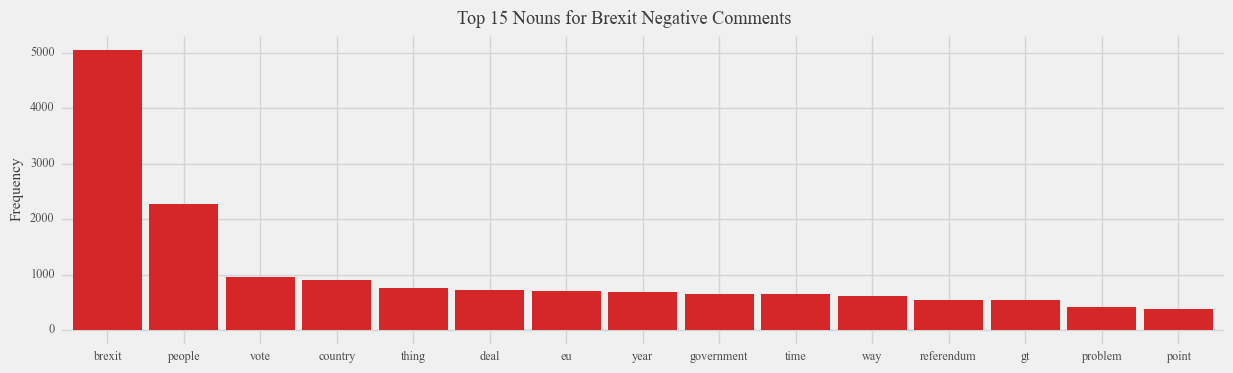

<ggplot: (8790846942558)>

In [24]:
# identify nouns of negative comments
negative_brexit_nouns = []
negative_brexit_nouns_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] < 0, 'nouns']

for value in negative_brexit_nouns_series: 
    for word in value:
        negative_brexit_nouns.append(word)

temp = pd.DataFrame({'theme': negative_brexit_nouns})
frequency = temp['theme'].value_counts().reset_index()
frequency.columns = ['theme', 'count']
top_15 = frequency.head(15)

# plot top 15 nouns for negative comments
plot = (
    ggplot(data=top_15) +
    aes(x='reorder(theme, -count)', y='count') +
    geom_bar(stat='identity', fill = '#d62728') +
    xlab('') +
    ylab('Frequency') +
    ggtitle('Top 15 Nouns for Brexit Negative Comments') + 
    theme_538() +
    theme(figure_size=(15, 4)) +
    theme(text=element_text(family='Times New Roman'))
)

plot

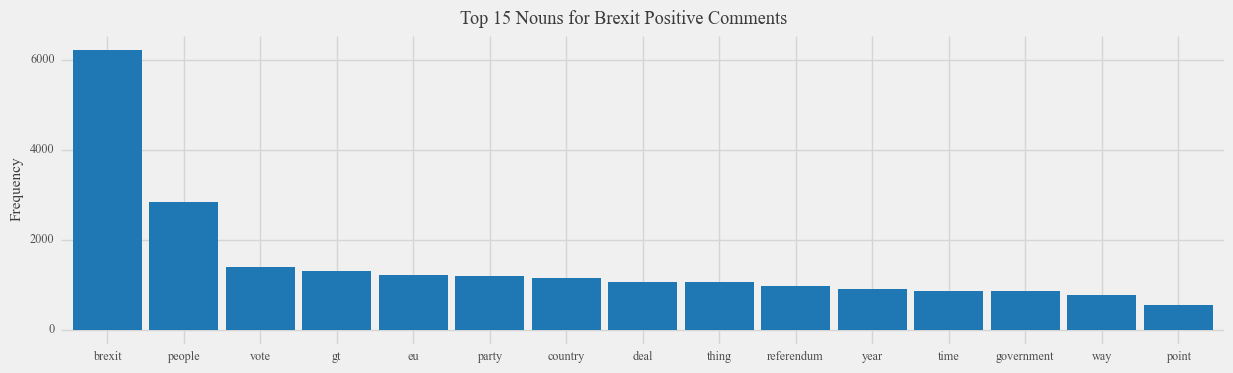

<ggplot: (8790848141331)>

In [25]:
# identify nouns of positive comments
positive_brexit_nouns = []
positive_brexit_nouns_series = df_reddit_brexit_nltk.loc[df_reddit_brexit_nltk['score'] > 0, 'nouns']

for value in positive_brexit_nouns_series:
    for word in value:
        positive_brexit_nouns.append(word)

temp = pd.DataFrame({'theme': positive_brexit_nouns})
frequency = temp['theme'].value_counts().reset_index()
frequency.columns = ['theme', 'count']
top_15 = frequency.head(15)

# plot top 15 nouns for negative comments
plot = (
    ggplot(data=top_15) +
    aes(x='reorder(theme, -count)', y='count') +
    geom_bar(stat='identity', fill = '#1f77b4') +
    xlab('') +
    ylab('Frequency') +
    ggtitle('Top 15 Nouns for Brexit Positive Comments') + 
    theme_538() +
    theme(figure_size=(15, 4)) +
    theme(text=element_text(family='Times New Roman'))
)

plot